# 1. Importing libraries and Dataset

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Medicaldataset.csv')

# 2. Display top 5 rows of the dataset

In [10]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,male,74,223,118,161.0,2.970,0.628,positive
1,51,male,74,223,118,105.0,1.600,0.004,negative
2,29,female,74,223,118,86.0,4.930,0.003,positive
3,50,female,120,220,128,76.0,0.929,0.072,positive
4,60,male,110,220,128,101.0,1.280,0.002,negative


In [11]:
# Normal Resting Heart Rate - 60–100 bpm (Beats Per Minute)
# Systolic blood pressure – Top number in BP reading (mmHg). Normal range:90–120 mmHg.
# Diastolic blood pressure – Bottom number in BP reading (mmHg).Normal range:60–80 mmHg.
# Blood sugar – Measured in mg/dL.(milligrams per deciliter)
# CK-MB – Creatine kinase-MB (ng/mL), a heart enzyme marker.(nanograms per milliliter)
    # 5 ng/mL → Normal for most people.
    # 5–10 ng/mL → Possible cardiac damage.
    # 10–25 ng/mL or more → Often seen in heart attacks.
# Troponin – A protein indicating heart muscle damage (ng/mL).
    # 0.04 ng/mL is considered normal.
    # 0.04–0.4 ng/mL could be borderline or minor damage.
    # 0.4 ng/mL (especially much higher) usually suggests significant heart damage.
# Result – Indicates if the case is 'positive' or 'negative' for heart disease.

# 3. Shape of dataset

In [12]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 1319
Number of Columns 9


## 4. Get information Abount our Dataset like Total number of Rows, Number of Columns, Datatype of each columns and memory requirement

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.9+ KB


# 5.Checking for Duplicated data

In [14]:
dup=df.duplicated().any()
dup

False

# 6. Get over all statistics about the dataset

In [15]:
df.describe()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,76.062168,127.170584,72.269143,146.634344,7.261879,0.360942
std,13.647315,15.350456,26.122720,14.033924,74.923045,12.297596,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,135.000000,223.000000,154.000000,541.000000,89.610000,10.300000


In [16]:
df.describe(include='O')

,Gender,Result
count,1319,1319
unique,2,2
top,male,positive
freq,869,810


## 7. How many people have heart disease and how many people don't have heart disease in this dataset

In [17]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

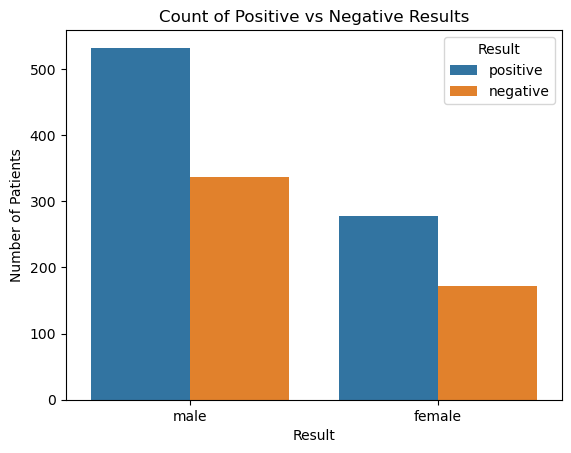

In [18]:
sns.countplot(x='Gender',hue="Result", data=df)
plt.title("Count of Positive vs Negative Results")
plt.xlabel("Result")
plt.ylabel("Number of Patients")
plt.show()

# 8. What is the distribution of positive vs negative results by age group?

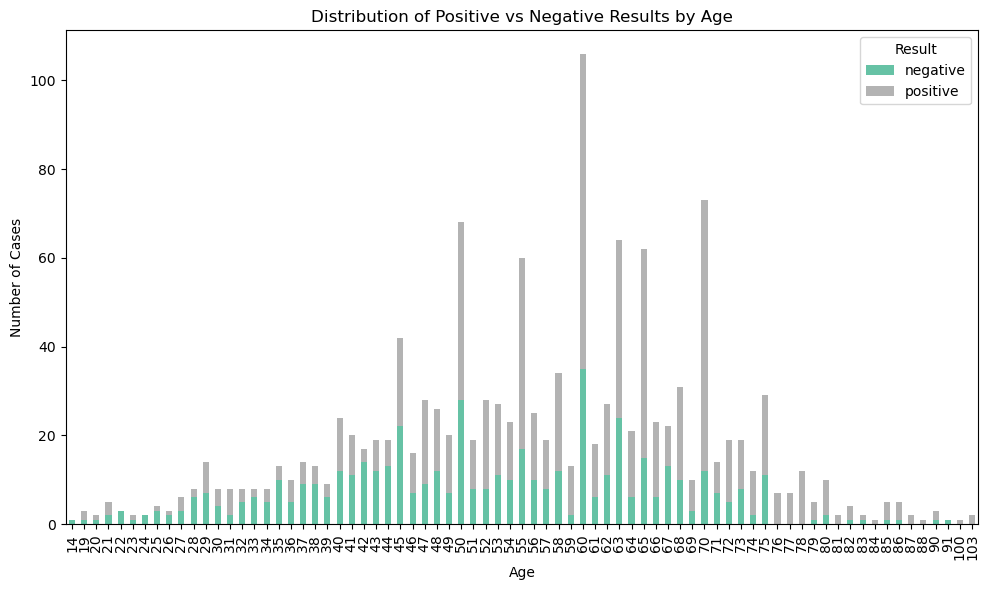

In [19]:
age_result_counts = df.groupby(['Age', 'Result']).size().unstack(fill_value=0)
age_result_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Distribution of Positive vs Negative Results by Age")
plt.xlabel("Age")
plt.ylabel("Number of Cases")
plt.legend(title='Result')
plt.tight_layout()
plt.show()

# 9. Posivite Results and Negative Results

In [20]:
positive_result=df.loc[df["Result"]=="positive"]
positive_result

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,male,74,223,118,161.0,2.970,0.628,positive
2,29,female,74,223,118,86.0,4.930,0.003,positive
3,50,female,120,220,128,76.0,0.929,0.072,positive
5,63,male,60,214,82,87.0,30.000,2.370,positive
6,65,male,60,214,82,189.0,1.210,0.067,positive
...,...,...,...,...,...,...,...,...,...
1303,65,female,77,76,154,93.0,3.810,0.029,positive
1304,65,female,62,76,55,107.0,1.680,0.024,positive
1305,65,female,62,76,55,113.0,1.670,0.023,positive
1314,57,female,61,67,80,204.0,33.090,0.003,positive


In [21]:
positive_result.describe(include='O')

,Gender,Result
count,810,810
unique,2,1
top,male,positive
freq,532,810


In [22]:
negative_result=df.loc[df["Result"]=="negative"]
negative_result.describe(include='O')

,Gender,Result
count,509,509
unique,2,1
top,male,negative
freq,337,509


# 10. Checking age distribution positive people in this dataset

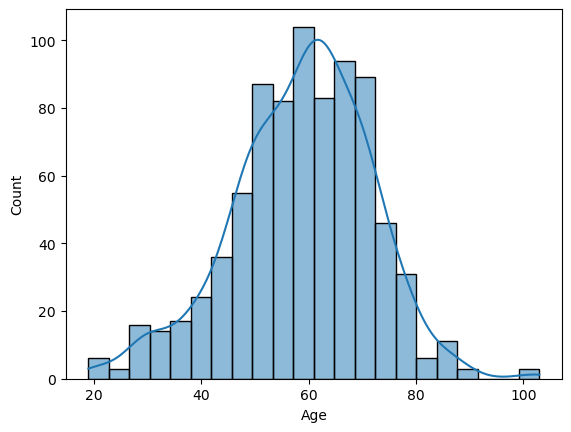

In [23]:
sns.histplot(x="Age",data=positive_result,kde=True)
plt.show()

# 11. Heart Rate

In [24]:
positive_hr = df[df['Result'] == 'positive']['Heart rate']
positive_hr.describe()

count    810.000000
mean      76.150617
std       15.644206
min       20.000000
25%       64.000000
50%       74.000000
75%       85.750000
max      135.000000
Name: Heart rate, dtype: float64

In [25]:
negative_hr = df[df['Result'] == 'negative']['Heart rate']
negative_hr.describe()

count    509.000000
mean      75.921415
std       14.885181
min       20.000000
25%       64.000000
50%       75.000000
75%       84.000000
max      132.000000
Name: Heart rate, dtype: float64

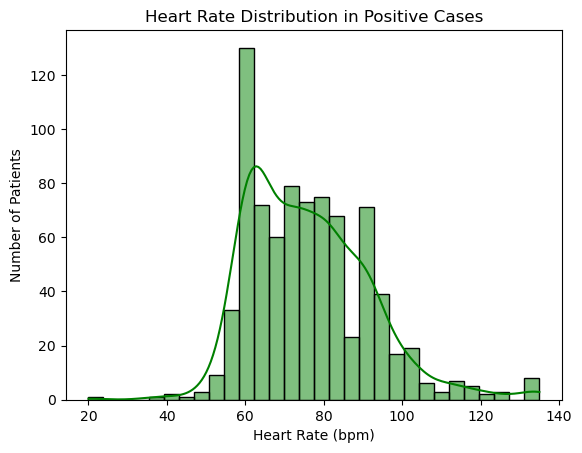

In [26]:
sns.histplot(positive_hr, bins=30, kde=True, color='green')
plt.title("Heart Rate Distribution in Positive Cases")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Number of Patients")
plt.show()

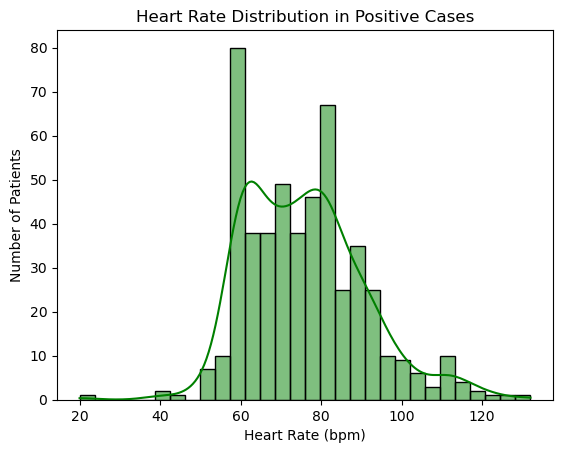

In [27]:
sns.histplot(negative_hr, bins=30, kde=True, color='green')
plt.title("Heart Rate Distribution in Positive Cases")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Number of Patients")
plt.show()

# 12. Top number in BP reading and Bottom number in BP reading for positive people

In [28]:
Top_BP_Pos=positive_result.loc[(positive_result["Systolic blood pressure"]<90) |(positive_result["Systolic blood pressure"]>120)]
Top_BP_Pos.describe()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,59.135556,76.248889,141.728889,77.528889,145.382222,10.037960,0.599727
std,13.149367,14.614583,24.620999,14.439500,72.663612,15.360603,1.416567
min,20.000000,40.000000,65.000000,38.000000,50.000000,0.452000,0.003000
25%,51.000000,64.000000,128.000000,68.000000,99.000000,1.882500,0.017000
50%,60.000000,75.000000,139.000000,78.000000,116.000000,3.635000,0.047000
75%,68.000000,84.750000,153.000000,85.000000,167.000000,10.300000,0.534500
max,103.000000,132.000000,223.000000,154.000000,500.000000,89.610000,10.300000


In [29]:
Btm_BP_pos=positive_result.loc[(positive_result["Diastolic blood pressure"]<60) |(positive_result["Diastolic blood pressure"]>80)]
Btm_BP_pos.describe(include='O')

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,334.000000,334.000000,334.00000,334.000000,334.000000,334.000000,334.000000
mean,58.553892,76.032934,132.38024,74.332335,141.940120,10.527171,0.559503
std,13.394738,14.073876,31.68078,20.083318,69.120707,16.501550,1.273892
min,21.000000,20.000000,65.00000,38.000000,75.000000,0.353000,0.003000
25%,49.250000,64.000000,107.50000,55.000000,97.000000,1.785000,0.018250
50%,60.000000,76.000000,131.50000,82.000000,114.000000,3.430000,0.051000
75%,68.000000,86.000000,150.00000,89.000000,161.750000,10.322500,0.489250
max,103.000000,125.000000,223.00000,154.000000,434.000000,89.610000,10.000000


# 13. Top number in BP reading and Bottom number in BP reading for Negative people

In [45]:
Top_BP_Nag=negative_result.loc[(negative_result["Systolic blood pressure"]<90) | (negative_result["Systolic blood pressure"]>120)]
Top_BP_Nag.describe(include='O')

,Gender,Result
count,320,320
unique,2,1
top,male,negative
freq,217,320


In [44]:
Btm_BP_Nag=negative_result.loc[(negative_result["Diastolic blood pressure"]<60) |(negative_result["Diastolic blood pressure"]>80)]
Btm_BP_Nag.describe(include='O')

,Gender,Result
count,253,253
unique,2,1
top,male,negative
freq,170,253


# 14. Checking Blood Sugar reading for positive people and for Negative people

In [39]:
Bld_suger1=positive_result.loc[(positive_result["Blood sugar"]>200)]
Bld_suger1.describe(include='O')

,Gender,Result
count,139,139
unique,2,1
top,male,positive
freq,106,139


In [40]:
Bld_suger2=negative_result.loc[(negative_result["Blood sugar"]>200)]
Bld_suger2.describe(include='O')

,Gender,Result
count,101,101
unique,2,1
top,male,negative
freq,56,101


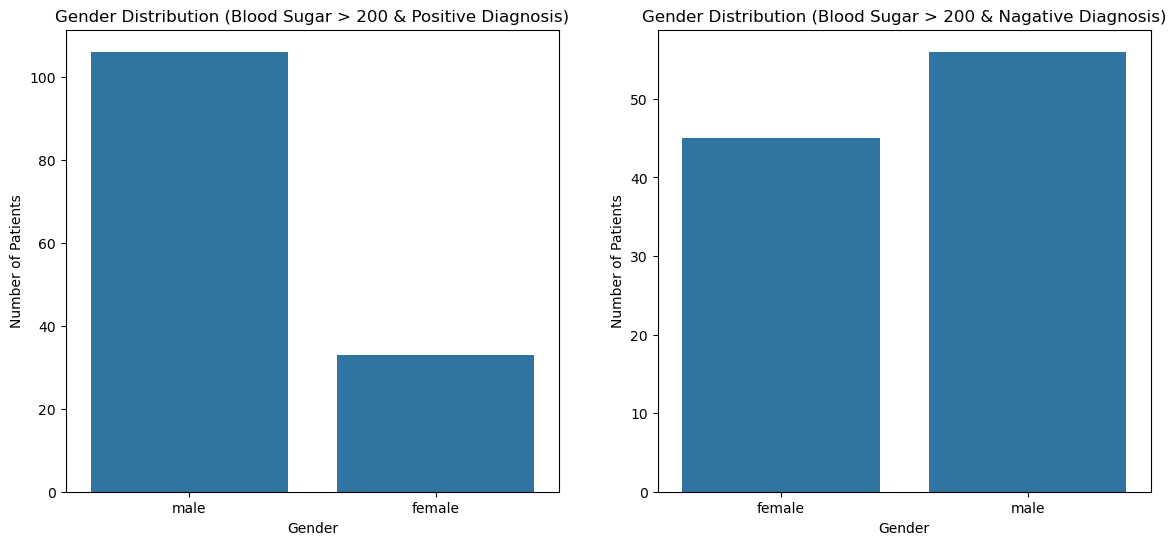

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=Bld_suger1, x='Gender')
plt.title("Gender Distribution (Blood Sugar > 200 & Positive Diagnosis)")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

plt.subplot(1,2,2)
sns.countplot(data=Bld_suger2, x='Gender')
plt.title("Gender Distribution (Blood Sugar > 200 & Nagative Diagnosis)")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()

# 15. Checking Creatine  kinase-MB positive people and for Negative people

In [36]:
CK1=positive_result.loc[(positive_result["CK-MB"]>5)]
CK1.describe(include='O')

,Gender,Result
count,350,350
unique,2,1
top,male,positive
freq,235,350


In [37]:
CK2=negative_result.loc[(negative_result["CK-MB"]>5)]
CK2.describe(include='O')

,Gender,Result
count,29,29
unique,2,1
top,male,negative
freq,21,29


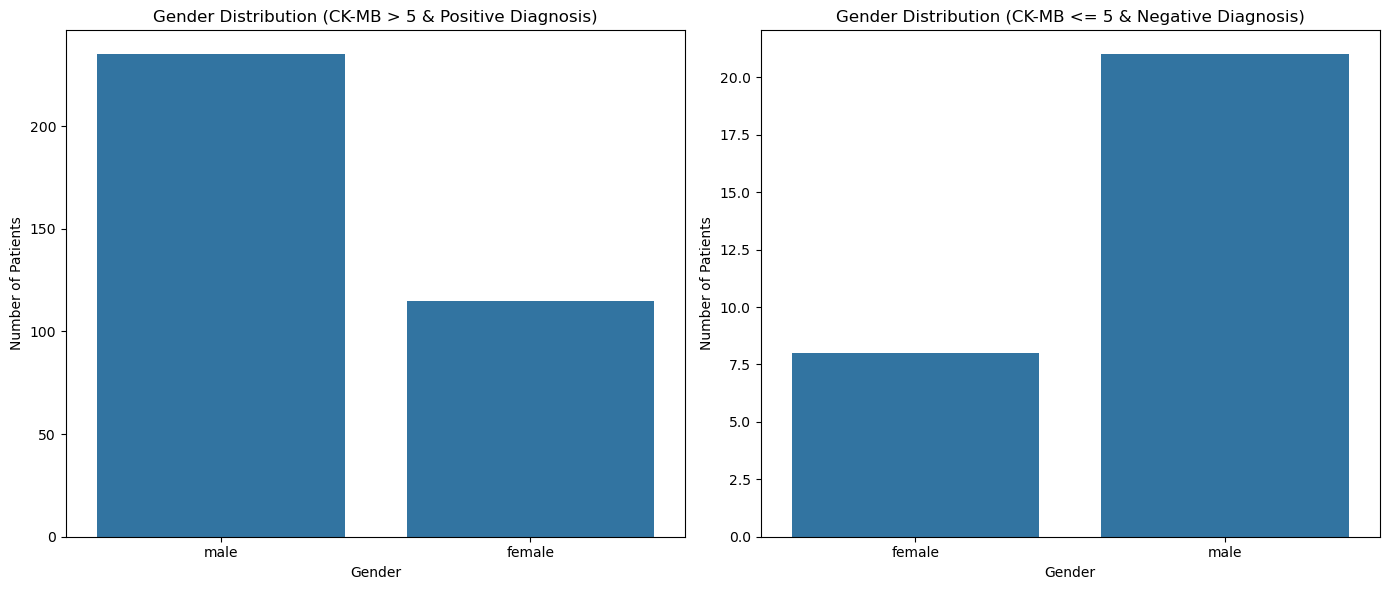

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=CK1, x='Gender')
plt.title("Gender Distribution (CK-MB > 5 & Positive Diagnosis)")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.tight_layout()


plt.subplot(1,2,2)
sns.countplot(data=CK2, x='Gender')
plt.title("Gender Distribution (CK-MB <= 5 & Negative Diagnosis)")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# 16. Checking Troponin positive people and for Negative people

In [33]:
Trop1=positive_result.loc[(positive_result["Troponin"]>0.04)]
Trop1.describe(include='O')

,Gender,Result
count,422,422
unique,2,1
top,male,positive
freq,284,422


In [34]:
Trop2=negative_result.loc[(negative_result["Troponin"]>0.04)]
Trop2.describe(include='O')

,Gender,Result
count,2,2
unique,1,1
top,male,negative
freq,2,2


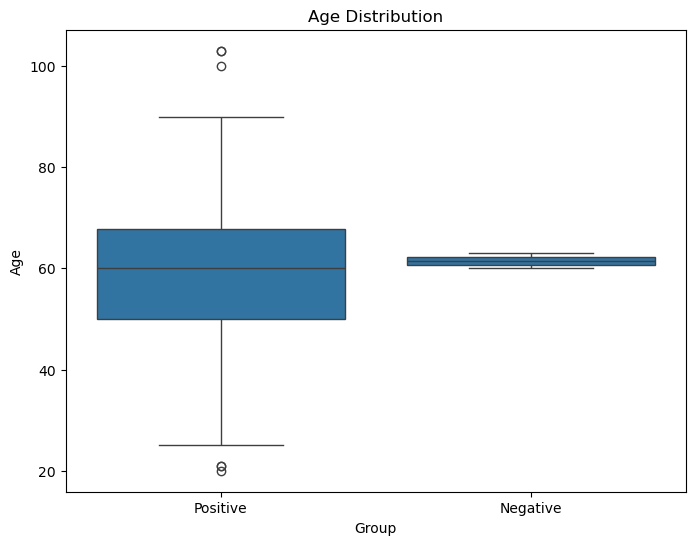

In [35]:
Trop1 = Trop1.copy()
Trop1['Group'] = 'Positive'

Trop2 = Trop2.copy()
Trop2['Group'] = 'Negative'

combined = pd.concat([Trop1, Trop2])

plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='Age', data=combined)
plt.title('Age Distribution')
plt.show()